<a href="https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis?scriptVersionId=162365728" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:#800080;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;">SharkTank US Exploratory Data Analysis (EDA)</p>
## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2024-Feb-10


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg', width=360, height=270)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-us-dataset
shark_tank = pd.read_csv('/kaggle/input/shark-tank-us-dataset/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 296
-rw-r--r-- 1 nobody nogroup 299437 Feb 10 05:18 'Shark Tank US dataset.csv'

There are 1325 rows and 51 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number              Startup Name  Episode Number  Pitch Number  \
0              1            AvaTheElephant               1             1   
1              1        Mr.Tod'sPieFactory               1             2   
2              1                   Wispots               1             3   
3              1  CollegeFoxesPackingBoxes               1             4   
4              1                  IonicEar               1             5   

  Season Start Season End Original Air Date           Industry  \
0     9-Aug-09   5-Feb-10          9-Aug-09    Health/Wellness   
1     9-Aug-09   5-Feb-10          9-Aug-09  Food and Beverage   
2     9-Aug-09   5-Feb-10          9-Aug-09  Business Services   
3     9-Aug-09   5-Feb-10          9-Aug-09     Lifestyle/Home   
4     9-Aug-09   5-Feb-10          9-Aug-09      Software/Tech   

                              Business Description Pitchers Gender  \
0           Ava The Elephant - Baby and Child Care          Female   
1           Mr. Tod's Pie Factory - Specialty Food            Male   
2                      Wispots - Consumer Services            Male   
3  College Foxes Packing Boxes - Consumer Services            Male   
4                            Ionic Ear - Novelties            Male   

  Pitchers City Pitchers State Pitchers Average Age  \
0       Atlanta             GA                  NaN   
1      Somerset             NJ                  NaN   
2          Cary             NC                  NaN   
3         Tampa             FL                  NaN   
4      St. Paul             MN                  NaN   

            Entrepreneur Names                      Company Website  \
0              Tiffany Krumins       http://www.avatheelephant.com/   
1                   Tod Wilson                  http://whybake.com/   
2               Kevin Flannery              http://www.wispots.com/   
3  Nick Friedman, Omar Soliman  http://collegehunkshaulingjunk.com/   
4               Darrin Johnson                                  NaN   

   Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
0                     0.0           4.15                50000   
1                     0.0           4.15               460000   
2                     0.0           4.15              1200000   
3                     0.0           4.15               250000   
4                     0.0           4.15              1000000   

   Original Offered Equity  Valuation Requested  Got Deal  Total Deal Amount  \
0                     15.0               333333         1            50000.0   
1                     10.0              4600000         1           460000.0   
2                     10.0             12000000         0                NaN   
3                     25.0              1000000         0                NaN   
4                     15.0              6666667         0                NaN   

   Total Deal Equity  Deal Valuation  Number of sharks in deal  ...  \
0               55.0         90909.0                       1.0  ...   
1               50.0        920000.0                       2.0  ...   
2                NaN             NaN                       NaN  ...   
3                NaN             NaN                       NaN  ...   
4                NaN             NaN                       NaN  ...   

   Equity Per Shark  Royalty Deal  Loan  Barbara Corcoran Investment Amount  \
0              55.0           NaN   NaN                             50000.0   
1              25.0           NaN   NaN                            230000.0   
2               NaN           NaN   NaN                                 NaN   
3               NaN           NaN   NaN                                 NaN   
4               NaN           NaN   NaN                                 NaN   

   Barbara Corcoran Investment Equity  Mark Cuban Investment Amount  \
0                                55.0                           NaN   
1                                25.0                 

In [6]:
shark_tank.tail(10).T

1315  \
Season Number                                                      15   
Startup Name                                                 Poplight   
Episode Number                                                     11   
Pitch Number                                                     1316   
Season Start                                                29-Sep-23   
Season End                                                        NaN   
Original Air Date                                           19-Jan-24   
Industry                                               Lifestyle/Home   
Business Description                         Renter friendly lighting   
Pitchers Gender                                                Female   
Pitchers City                                                  Denver   
Pitchers State                                                     CO   
Pitchers Average Age                                           Middle   
Entrepreneur Names                  Caroline Matthes and Rose Fierman   
Company Website                              https://thepoplight.com/   
Multiple Entrepreneurs                                            1.0   
US Viewership                                                    3.88   
Original Ask Amount                                            150000   
Original Offered Equity                                           8.0   
Valuation Requested                                           1875000   
Got Deal                                                            1   
Total Deal Amount                                            150000.0   
Total Deal Equity                                                 8.0   
Deal Valuation                                              1875000.0   
Number of sharks in deal                                          1.0   
Investment Amount Per Shark                                  150000.0   
Equity Per Shark                                                  8.0   
Royalty Deal                                                      1.0   
Loan                                                              NaN   
Barbara Corcoran Investment Amount                                NaN   
Barbara Corcoran Investment Equity                                NaN   
Mark Cuban Investment Amount                                      NaN   
Mark Cuban Investment Equity                                      NaN   
Lori Greiner Investment Amount                                    NaN   
Lori Greiner Investment Equity                                    NaN   
Robert Herjavec Investment Amount                                 NaN   
Robert Herjavec Investment Equity                                 NaN   
Daymond John Investment Amount                                    NaN   
Daymond John Investment Equity                                    NaN   
Kevin O Leary Investment Amount                              150000.0   
Kevin O Leary Investment Equity                                   8.0   
Guest Investment Amount                                           NaN   
Guest Investment Equity                                           NaN   
Guest Name                                                        NaN   
Barbara Corcoran Present                                          1.0   
Mark Cuban Present                                                1.0   
Lori Greiner Present                                              1.0   
Robert Herjavec Present                                           1.0   
Daymond John Present                                              NaN   
Kevin O Leary Present                                             1.0   
Guest Present                                                     NaN   

                                                     1316  \
Season Number                                          15   
Startup Name                                      The Duo   
Episode Number                                         11   
Pitch Number            

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 51 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1325 non-null   Int32  
 1   Startup Name                        1325 non-null   object 
 2   Episode Number                      1325 non-null   Int32  
 3   Pitch Number                        1325 non-null   Int32  
 4   Season Start                        1325 non-null   object 
 5   Season End                          1274 non-null   object 
 6   Original Air Date                   1325 non-null   object 
 7   Industry                            1325 non-null   object 
 8   Business Description                1325 non-null   object 
 9   Pitchers Gender                     1318 non-null   object 
 10  Pitchers City                       517 non-null    object 
 11  Pitchers State                      778 non

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 15
Number of unique values in Startup Name - 1322
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 1325
Number of unique values in Season Start - 15
Number of unique values in Season End - 14
Number of unique values in Original Air Date - 319
Number of unique values in Industry - 16
Number of unique values in Business Description - 1323
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers City - 256
Number of unique values in Pitchers State - 47
Number of unique values in Pitchers Average Age - 3
Number of unique values in Entrepreneur Names - 825
Number of unique values in Company Website - 565
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in US Viewership - 226
Number of unique values in Original Ask Amount - 78
Number of unique values in Original Offered Equity - 46
Number of unique values in Valuation Requested - 176
Number of unique value

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "total seasons in US SharkTank\n")
print(shark_tank['Pitch Number'].max(), "#startups came for pitching \n")

15 total seasons in US SharkTank

1325 #startups came for pitching 



In [13]:
# Season-wise number of episodes
pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')

Season Number   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15
Episode Number  14   9  15  26  29  29  29  24  24  23  24  25  24  22  13

In [14]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [15]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank USA - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

Pitchers Gender
Male          723
Female        351
Mixed Team    244
Name: count, dtype: int64 

Pitchers Gender
Male          55%
Female        27%
Mixed Team    19%
Name: proportion, dtype: object 



Text(0, 0.5, '')

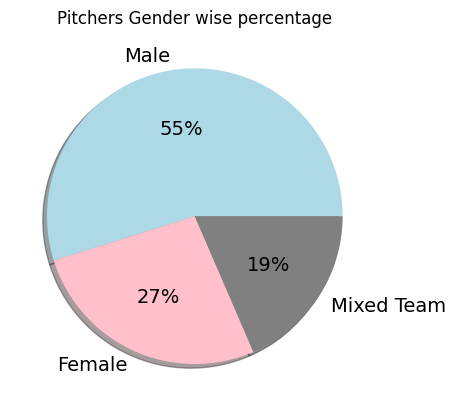

In [16]:
# Gender wise
print(shark_tank['Pitchers Gender'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Gender wise percentage")
shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f%%', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)
plt.ylabel('')

Pitchers Average Age
Middle    352
Young      30
Old         7
Name: count, dtype: int64 

Pitchers Average Age
Middle    90%
Young      8%
Old        2%
Name: proportion, dtype: object 



Text(0, 0.5, '')

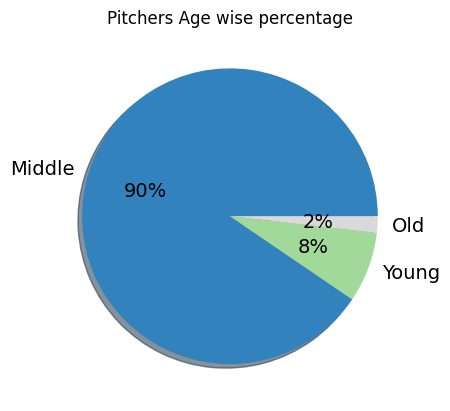

In [17]:
# Age wise
print(shark_tank['Pitchers Average Age'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Age wise percentage")
shark_tank["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)
plt.ylabel('')

### 💹 60% companies received offers and 40% startups could not convince Sharks to invest

In [18]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received", size=14)
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")

ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)
plt.ylabel('')

# 765 companies received offers & 509 startups could not convince #Sharks to invest.

Got Deal
1    800
0    525
Name: count, dtype: int64 

Got Deal
1    60%
0    40%
Name: proportion, dtype: object


Text(0, 0.5, '')

In [19]:
# Gender wise distribution, who received the offer
print(shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts())
plt.title("Gender wise distribution, who received the offer")
shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["blue", "yellow", "orange"], fontsize=14)
plt.ylabel('')

Pitchers Gender
Male          411
Female        224
Mixed Team    160
Name: count, dtype: int64


Text(0, 0.5, '')

In [20]:
# Gender wise distribution, who could NOT receive the offer
print(shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts())
plt.title("Gender wise distribution, who could NOT receive the offer")
shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%', fontsize=14)
plt.ylabel('')

Pitchers Gender
Male          312
Female        127
Mixed Team     84
Name: count, dtype: int64


Text(0, 0.5, '')

## ❗ USA Shark Tank dataset Visualizations/infographics in Tableau Public —
### https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1

In [21]:
IFrame("https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1", width=1100, height=1100)

In [22]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - $5,000,000


In [23]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - $10,000


In [24]:
# Sum of investment amount asked, in Shark Tank America
print("Sum of investment amount asked, by all startup companies, in US Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in US Shark Tank - $374,516,000


In [25]:
# Amount invested by all sharks, in US SharkTank
print("Amount invested by all sharks, in Shark Tank US -", format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank US - $234,058,166


In [26]:
# Sum of loan/debt amount, in American Shark Tank
print("Sum of loan/debt amount, given by all sharks, in American SharkTank -", format_currency(shark_tank['Loan'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of loan/debt amount, given by all sharks, in American SharkTank - $22,687,500


In [27]:
# Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in Millions'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in Millions', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in Millions', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in Millions'].map(float).map(str))
fig.show()

Startup Name
AirCar                     5000000.0
MokiDoorstep               3000000.0
SynDaverLabs               3000000.0
Zipz                       2500000.0
DBestProducts              2350000.0
Fizzics                    2000000.0
TenThirtyOneProductions    2000000.0
Vengo                      2000000.0
RuggedManiac               1750000.0
BeyondSushi                1500000.0
Sworkit                    1500000.0
XCraft                     1500000.0
Trunkster                  1400000.0
HyConn                     1250000.0
Jackson'sHonest            1250000.0
Name: Total Deal Amount, dtype: float64


In [28]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

# 9 startups sold entire company (equity) to Sharks

Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
TurboBaster             100.0
WineBalloon             100.0
LegacyShave              95.0
GrooveBook               80.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
ReaderestSpecsecure      65.0
TheLastLid               60.0
TreasureChestPets        60.0
CordaRoy's               58.0
Name: Total Deal Equity, dtype: float64


In [29]:
# Startups who sold 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3][["Season Number","Startup Name","Total Deal Amount"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name    24
dtype: int64
      Season Number                 Startup Name  Total Deal Amount
551               7                       Shefit           250000.0
584               7                        Trobo           166666.0
591               7                  TheDripDrop            50000.0
604               7  EVPExtremeVehicleProtection            50000.0
626               8             AngelsandTomboys            60000.0
633               8                  Sunscreeenr           800000.0
667               8                       Kooler            50000.0
695               8                      Goverre           200000.0
697               8            BootyQueenApparel           250000.0
702               8                PeoplesDesign            75000.0
726               9                  HumanBobber           120000.0
768               9              GoatPetProducts           499000.0
829              10                     OatMeals           500000.0
865             

In [30]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].count(),"\n")

shark_tank.loc[shark_tank['Loan'] >= 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity","Loan"]]

Number of startups who got debt/loan amount 53 



Season Number               Startup Name  Original Ask Amount  \
272               5           RapidRamenCooker               300000   
289               5                 BetterLife               400000   
291               5         PaparazziProposals               250000   
299               5                 Grace&Lace               175000   
300               5                       Yubo               150000   
433               6      Scratch&GrainBakingCo               150000   
459               6                   CocoJack               125000   
571               7                 BetterBack               750000   
580               7                      Vengo              2000000   
586               7                    Coolbox               500000   
621               8                     TekDry               500000   
622               8             NightRunner270               200000   
636               8                  StyleClub               500000   
640               8  Jack'sStands&Marketplaces                50000   
642               8                       Toor               500000   
647               8                    Inboard               750000   
651               8              SealedbySanta               150000   
670               8              DBestProducts               350000   
684               8      BlendtiqueWineCompany               250000   
686               8                   Rareform               300000   
703               8                Wine&Design               500000   
733               9                   WaiveCar               500000   
753               9                 EverlyWell              1000000   
754               9                       Mush               300000   
759               9                    Frywall               100000   
791               9               GunnarOptiks               750000   
845              10           MakeupJunkieBags               200000   
899              11                BoostOxygen              1000000   
924              11                      Outer               750000   
931              11                 Flexscreen               800000   
955              11                     Bohana               200000   
956              11                       Boho               300000   
959              11                      Goumi              1000000   
974              11               MuralPainter               300000   
1023             12                    Electra               350000   
1027             12               SliceofSauce               200000   
1029             12                  LunaMagic               200000   
1031             12                     Quevos               200000   
1045             12               ByootCompany                50000   
1059             12                     NuMilk              1000000   
1062             12                 BunchBikes               250000   
1085             12                FloatNGrill               200000   
1121             13                 TheRealElf               125000   
1150             13                    Ade+Ayo               175000   
1170             13                 Browndages                75000   
1172             13                     Plunge              1200000   
1177             13                   Pricklee               200000   
1208             14                 Collars&Co               300000   
1256             14                      Bleni               250000   
1257             14         TheIceCreamCanteen               100000   
1260             14                     Cincha               200000   
1264             14                 Tia Lupita               500000   
1274             15            GatsbyChocolate               500000   

      Total Deal Amount  Total Deal Equity       Loan  
272            150000.0              15.00   150000.0  
289            400000.0              17.00   400000.0  
291

In [31]:
# Startups who gave Royalty/Advisory shares
print("Number of startups who gave Royalty", shark_tank['Royalty Deal'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Deal'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 79 



Season Number             Startup Name  Original Ask Amount  \
6                 1            ClassroomJams               250000   
10                1              TurboBaster                35000   
26                1              ElementBars               150000   
69                2  FirstDefenseNasalScreen               500000   
72                2          ModMomFurniture                90000   
...             ...                      ...                  ...   
1267             14             YouGoNatural               400000   
1296             15          Supermix Studio               250000   
1300             15               Bunny Eyez               200000   
1311             15            Dingle Dangle                75000   
1315             15                 Poplight               150000   

      Total Deal Amount  Total Deal Equity  
6              250000.0              100.0  
10              35000.0              100.0  
26             150000.0               30.0  
69             750000.0               30.0  
72              90000.0               33.0  
...                 ...                ...  
1267           400000.0               10.0  
1296           250000.0               20.0  
1300           200000.0               20.0  
1311            75000.0               20.0  
1315           150000.0                8.0  

[79 rows x 5 columns]

In [32]:
# Word cloud based on Startup Names
text = " Shark Tank ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 💰 Which shark invested most ?

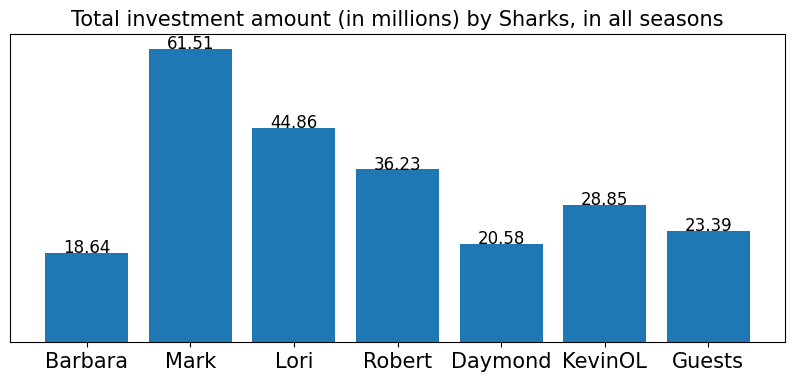

In [33]:
# Amount Invested by sharks
Amount = [(shark_tank['Barbara Corcoran Investment Amount']/1000000).sum(), (shark_tank['Mark Cuban Investment Amount']/1000000).sum(), (shark_tank['Lori Greiner Investment Amount']/1000000).sum(), (shark_tank['Robert Herjavec Investment Amount']/1000000).sum(),
    (shark_tank['Daymond John Investment Amount']/1000000).sum(), (shark_tank['Kevin O Leary Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

In [34]:
# Equity received by sharks
Equity = [shark_tank['Barbara Corcoran Investment Equity'].sum(), shark_tank['Mark Cuban Investment Equity'].sum(), shark_tank['Lori Greiner Investment Equity'].sum(), shark_tank['Robert Herjavec Investment Equity'].sum(),
    shark_tank['Daymond John Investment Equity'].sum(), shark_tank['Kevin O Leary Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

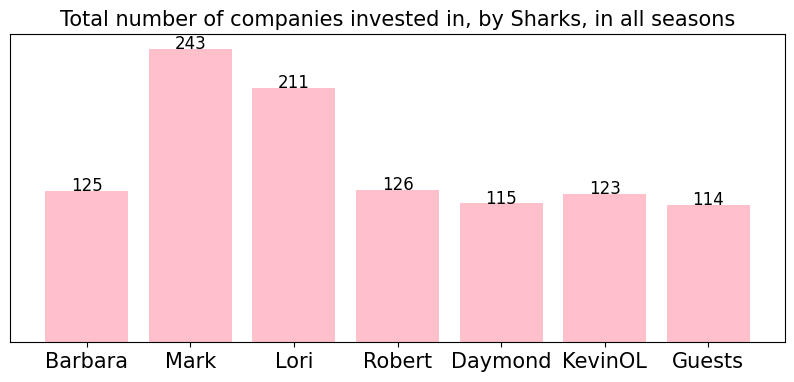

In [35]:
# Number of companies invested
Amount = [(shark_tank['Barbara Corcoran Investment Amount']).count(), (shark_tank['Mark Cuban Investment Amount']).count(), (shark_tank['Lori Greiner Investment Amount']).count(), (shark_tank['Robert Herjavec Investment Amount']).count(),
    (shark_tank['Daymond John Investment Amount']).count(), (shark_tank['Kevin O Leary Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested in, by Sharks, in all seasons", fontsize=15)
plt.show()

In [36]:
# Top 5, guests sharks who invested in most number of companies
shark_tank.groupby('Guest Name').size().nlargest(5)

Guest Name
Daniel Lubetzky    18
Alex Rodriguez      8
Chris Sacca         8
Emma Grede          8
Rohan Oza           8
dtype: int64

In [37]:
# Investment amount by guests, in Millions
round(shark_tank.groupby(["Guest Name"])["Guest Investment Amount"].sum().sort_values(ascending=False)/1000000,2)

Guest Name
Daniel Lubetzky      4.74
Rohan Oza            3.58
Chris Sacca          1.57
Matt Higgins         1.52
Emma Grede           1.38
Alex Rodriguez       1.24
Kendra Scott         1.10
Tony Xu              0.88
Peter Jones          0.80
Sara Blakely         0.70
Kevin Hart           0.65
Kevin Harrington     0.51
Jamie Siminoff       0.50
Maria Sharapova      0.45
Charles Barkley      0.38
Richard Branson      0.36
Gwyneth Paltrow      0.32
Candace Nelson       0.25
Anne Wojcicki        0.25
Daniel Lubetzsky     0.25
Nirav Tolia          0.22
Katrina Lake         0.20
Blake Mycoskie       0.20
Ashton Kutcher       0.20
Troy Carter          0.20
Michael Rubin        0.18
John Paul DeJoria    0.15
Nick Woodman         0.12
Bethenny Frankel     0.12
Jason Blum           0.10
Alli Webb            0.09
Nirv Tolia           0.08
Jeff Foxworthy       0.05
Steve Tisch          0.05
Name: Guest Investment Amount, dtype: float64

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

## 🔥Barbara Corcoran's Investments


Total investments by Barbara Corcoran 125
Investment amount by Barbara Corcoran $18,640,000
Equity received by Barbara Corcoran 2836.2 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                             50000.0
         Mr.Tod'sPieFactory       Food and Beverage                            230000.0
              ClassroomJams      Children/Education                             50000.0
             StressFreeKids      Children/Education                            250000.0
                  Coverplay      Children/Education                             35000.0
                    BodyJac Fitness/Sports/Outdoors                            180000.0
         PorkBarrelBBQSauce       Food and Beverage                             50000.0
          TreasureChestPets            Pet

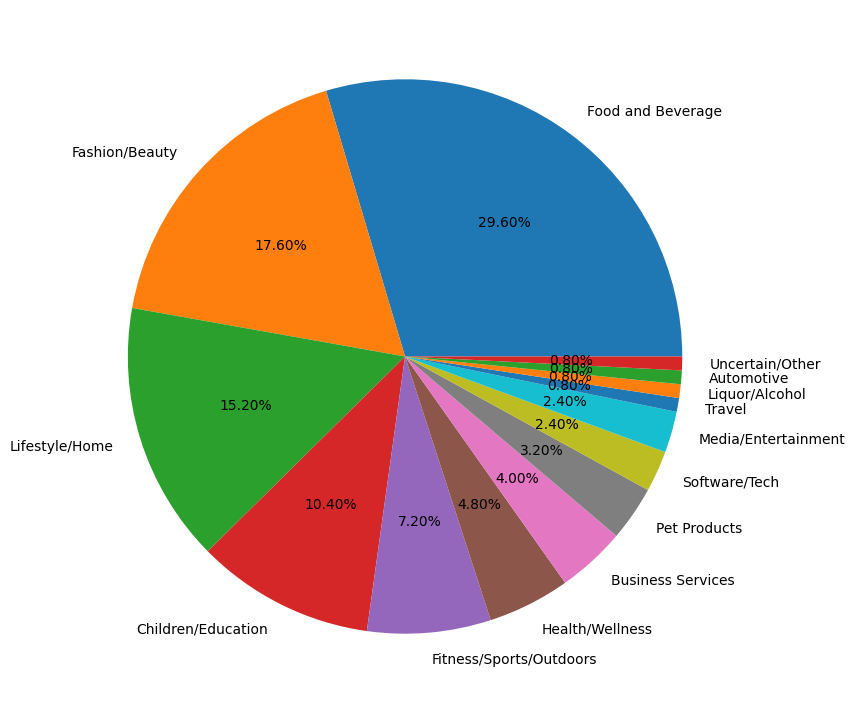

In [38]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-3:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Barbara Corcoran", round(shark_tank['Barbara Corcoran Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nBarbara Corcoran industry wise investments\n")
print(shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0] [["Startup Name","Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity"]].sort_values(by="Barbara Corcoran Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Barbara Corcoran Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎇 Mark Cuban's Investments

Total investments by Mark Cuban 243
Investment amount by Mark Cuban $61,507,666.67
Equity received by Mark Cuban 4203.02 % in different companies

Company details:
---------------------------------------------------------------------------
             Startup Name                Industry  Mark Cuban Investment Amount
            ClassroomJams      Children/Education                  5.000000e+04
                TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                 Toygaroo      Children/Education                  1.000000e+05
  FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                   HyConn         Uncertain/Other                  1.250000e+06
                    EZVIP     Media/Entertainment                  7.500000e+04
           TheCleanBottle       Food and Beverage                  6.000000e+04
    IWantToDrawACatForYou           Software/Tech                  2.500000e+04
              WineBalloon       Food and

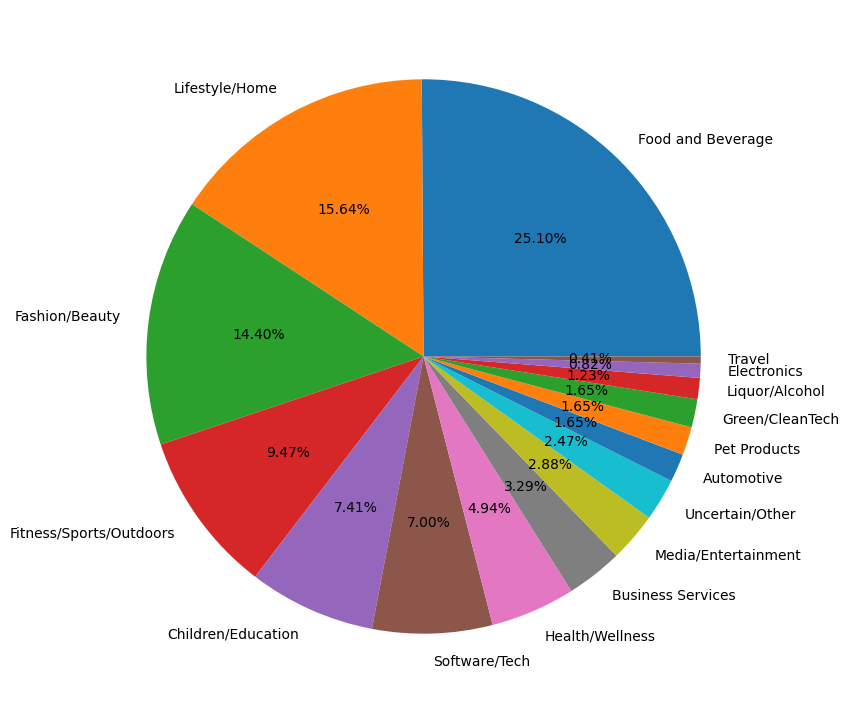

In [39]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-3:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Mark Cuban", round(shark_tank['Mark Cuban Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0] [["Startup Name","Mark Cuban Investment Amount","Mark Cuban Investment Equity"]].sort_values(by="Mark Cuban Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Mark Cuban Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ✳️ Lori Greiner's Investments

In [40]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-3:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Lori Greiner", round(shark_tank['Lori Greiner Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0] [["Startup Name","Lori Greiner Investment Amount","Lori Greiner Investment Equity"]].sort_values(by="Lori Greiner Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Lori Greiner Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Lori Greiner 211
Investment amount by Lori Greiner $44,859,166.67
Equity received by Lori Greiner 3371.41 % in different companies

Company details:
---------------------------------------------------------------------------
          Startup Name                Industry  Lori Greiner Investment Amount
                ShowNo          Fashion/Beauty                    7.500000e+04
         M3GirlDesigns          Fashion/Beauty                    1.000000e+05
   ReaderestSpecsecure          Lifestyle/Home                    1.500000e+05
               NailPak          Fashion/Beauty                    5.000000e+04
               BagBowl          Lifestyle/Home                    4.000000e+04
             Back9Dips       Food and Beverage                    7.500000e+04
            MarzSprays         Health/Wellness                    2.000000e+05
            ScrubDaddy          Lifestyle/Home                    2.000000e+05
          TheCoolWazoo      Children/Educat

## 🚀 Robert Herjavec's Investments

In [41]:
print("Total investments by Robert Herjavec", shark_tank[shark_tank['Robert Herjavec Investment Amount']>0][['Robert Herjavec Investment Amount']].count().to_string()[-3:])
print("Investment amount by Robert Herjavec", format_currency(shark_tank['Robert Herjavec Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Robert Herjavec", round(shark_tank['Robert Herjavec Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0][["Startup Name","Industry","Robert Herjavec Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRobert Herjavec industry wise investments\n")
print(shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0] [["Startup Name","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity"]].sort_values(by="Robert Herjavec Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Robert Herjavec Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by Robert Herjavec 126
Investment amount by Robert Herjavec $36,230,666
Equity received by Robert Herjavec 2282.75 % in different companies

Company details:
---------------------------------------------------------------------------
           Startup Name                Industry  Robert Herjavec Investment Amount
           APerfectPear       Food and Beverage                       2.500000e+05
          ClassroomJams      Children/Education                       5.000000e+04
         GiftCardRescue           Software/Tech                       1.000000e+05
       MyTherapyJournal         Health/Wellness                       4.000000e+04
          Soy-Yer-Dough       Food and Beverage                       1.000000e+05
         GrillCharmsSet          Fashion/Beauty                       5.000000e+04
            JumpForward      Children/Education                       3.000000e+05
      GreaseMonkeyWipes          Lifestyle/Home                       2.000000e+04
F

## 🎾 Daymond John's Investments

Total investments by Daymond John 115
Investment amount by Daymond John $20,582,333.33
Equity received by Daymond John 2926.48 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Daymond John Investment Amount
         Mr.Tod'sPieFactory       Food and Beverage                      230000.000
              ClassroomJams      Children/Education                       50000.000
              Soy-Yer-Dough       Food and Beverage                      100000.000
          TreasureChestPets            Pet Products                       50000.000
        GaylaBentleyFashion          Fashion/Beauty                      125000.000
          HellsBellsHelmets Fitness/Sports/Outdoors                      500000.000
              LipstickRemix          Fashion/Beauty                       52500.000
                   Nubrella          Fashion/Beauty                      200000.00

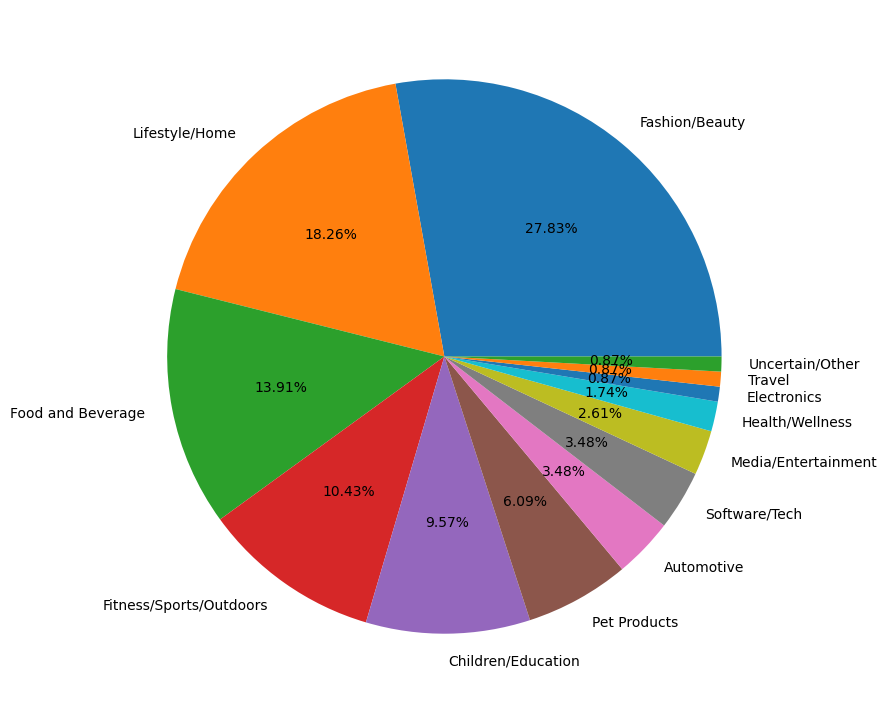

In [42]:
print("Total investments by Daymond John", shark_tank[shark_tank['Daymond John Investment Amount']>0][['Daymond John Investment Amount']].count().to_string()[-3:])
print("Investment amount by Daymond John", format_currency(shark_tank['Daymond John Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Daymond John", round(shark_tank['Daymond John Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Daymond John Investment Amount']>0][["Startup Name","Industry","Daymond John Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nDaymond John industry wise investments\n")
print(shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Daymond John Investment Amount']>0] [["Startup Name","Daymond John Investment Amount","Daymond John Investment Equity"]].sort_values(by="Daymond John Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Daymond John Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ⭐ Kevin O Leary's Investments

Total investments by Kevin O Leary 123
Investment amount by Kevin O Leary $28,847,500
Equity received by Kevin O Leary 1872.72 % in different companies

Company details:
---------------------------------------------------------------------------
          Startup Name                Industry  Kevin O Leary Investment Amount
          APerfectPear       Food and Beverage                     2.500000e+05
         ClassroomJams      Children/Education                     5.000000e+04
        GiftCardRescue           Software/Tech                     1.000000e+05
      MyTherapyJournal         Health/Wellness                     4.000000e+04
         Soy-Yer-Dough       Food and Beverage                     1.000000e+05
           JumpForward      Children/Education                     3.000000e+05
              Toygaroo      Children/Education                     1.000000e+05
          FridgeFronts          Lifestyle/Home                     5.000000e+04
           TalbottTeas       Food 

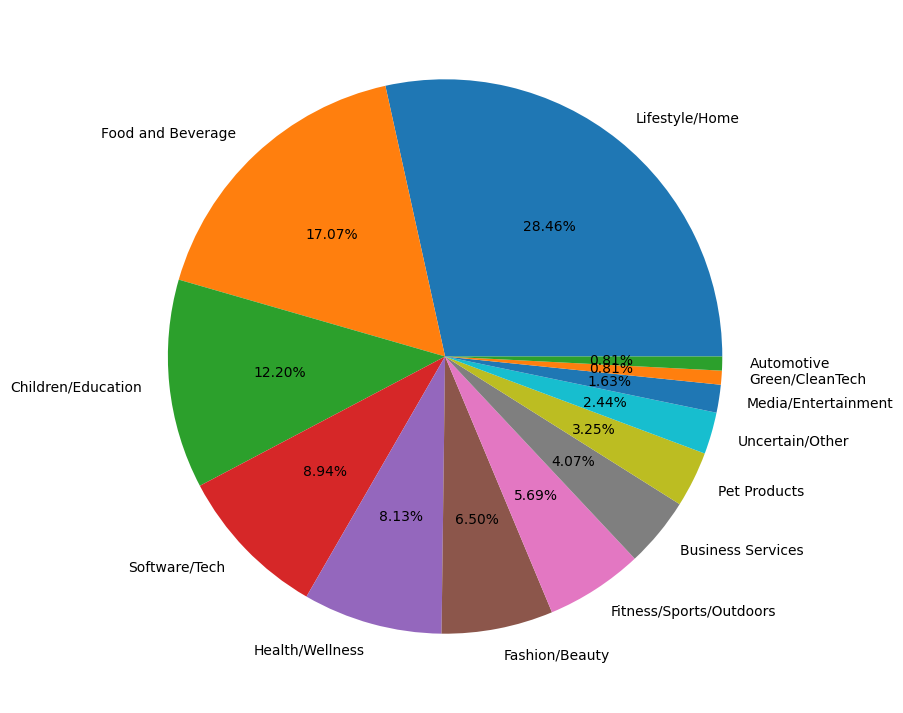

In [43]:
print("Total investments by Kevin O Leary", shark_tank[shark_tank['Kevin O Leary Investment Amount']>0][['Kevin O Leary Investment Amount']].count().to_string()[-3:])
print("Investment amount by Kevin O Leary", format_currency(shark_tank['Kevin O Leary Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Kevin O Leary", round(shark_tank['Kevin O Leary Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0][["Startup Name","Industry","Kevin O Leary Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nKevin O Leary industry wise investments\n")
print(shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0] [["Startup Name","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity"]].sort_values(by="Kevin O Leary Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Kevin O Leary Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎆 All Guest's Investments

In [44]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

Total investments by all Guests 14
Investment amount by all Guests $23,390,833.33
Equity received by all Guests 1762.3 % in different companies

Company details:
--------------------------------------------------------------------------------------------
             Startup Name                Industry  Guest Investment Amount        Guest Name
              TurboBaster       Food and Beverage             3.500000e+04  Kevin Harrington
              ElementBars Fitness/Sports/Outdoors             1.500000e+05  Kevin Harrington
               TheUROClub Fitness/Sports/Outdoors             2.500000e+04  Kevin Harrington
           Caffeindicator       Food and Beverage             2.000000e+05  Kevin Harrington
                 Hydromax Fitness/Sports/Outdoors             5.000000e+04    Jeff Foxworthy
                CitiKitty            Pet Products             1.000000e+05  Kevin Harrington
               Tree-T-Pee         Green/CleanTech             1.500000e+05 John Paul DeJoria
 

In [45]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in a deal", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

Number of sharks in deal
1.0    587
2.0    184
3.0     20
5.0      6
4.0      3
Name: count, dtype: int64 

Number of sharks in deal
1.0    73%
2.0    23%
3.0     2%
5.0     1%
4.0     0%
Name: proportion, dtype: object


In [46]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

      Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                 1  ClassroomJams           250000.0              100.0
161               4      BuggyBeds           250000.0               25.0
268               5   Breathometer          1000000.0               30.0
514               7         XCraft          1500000.0               25.0
814              10    CupBoardPro           100000.0               20.0
1272             14        Eyewris           125000.0               20.0


In [47]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of sharks in deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Mark did more solo deals, than any other Shark

Mark Cuban Investment Amount          123
Lori Greiner Investment Amount        105
Barbara Corcoran Investment Amount     83
dtype: int64

In [48]:
# Top 25 US 🇺🇸 states of pitcher's
tmp = shark_tank['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [49]:
# Top 20 cities
tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [50]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (USD) and Number times asked

Original Ask Amount
100000    163
200000    140
150000    138
500000    135
250000    121
300000    103
50000      87
75000      55
400000     52
125000     30
dtype: int64

In [51]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
10.0    429
20.0    225
5.0     186
15.0    159
25.0     73
30.0     33
8.0      32
7.0      19
12.0     15
6.0      14
dtype: int64

In [52]:
# ✅ Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Total Deal Amount (USD) and Number times invested
# Sharks mostly invested more than 100K per deal

Total Deal Amount
100000.0    102
200000.0     89
150000.0     84
300000.0     75
250000.0     72
500000.0     72
50000.0      44
75000.0      34
400000.0     27
600000.0     19
dtype: int64

In [53]:
# ✅ Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Total Deal Equity (in %) and Number times invested
# Sharks are expecting more than 20% equity, in a deal

Total Deal Equity
20.0    136
25.0    120
10.0     78
15.0     70
30.0     70
40.0     35
50.0     34
5.0      26
33.3     24
33.0     23
dtype: int64

In [54]:
# Mostly successful combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Got Deal'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in US Shark Tank, ask for 150K-300K with 10% equity ✅

Original Ask Amount  Original Offered Equity
200000               10.0                       40
150000               10.0                       38
100000               10.0                       35
300000               10.0                       34
250000               10.0                       27
100000               20.0                       25
500000               10.0                       21
150000               15.0                       20
500000               5.0                        20
250000               5.0                        17
dtype: int64

In [55]:
# Most frequently asked amount, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (USD) and Number times asked (but rejected by sharks) ❌

Original Ask Amount
500000    62
100000    59
200000    53
150000    48
250000    42
300000    36
50000     32
75000     22
400000    22
125000    15
dtype: int64

In [56]:
# Most frequently offered equity, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered (but rejected by sharks) ❌

Original Offered Equity
10.0    154
20.0    110
5.0      69
15.0     59
25.0     34
30.0     17
8.0      14
40.0      8
3.0       6
7.5       5
dtype: int64

In [57]:
# Mostly rejected combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Shark Tank US, don't ask for 100K with 10%/20% equity or 500K with 5% equity 🔴

Original Ask Amount  Original Offered Equity
100000               10.0                       23
                     20.0                       20
500000               5.0                        20
200000               10.0                       17
250000               10.0                       16
300000               10.0                       16
150000               10.0                       15
200000               20.0                       14
500000               10.0                       14
150000               20.0                       12
dtype: int64

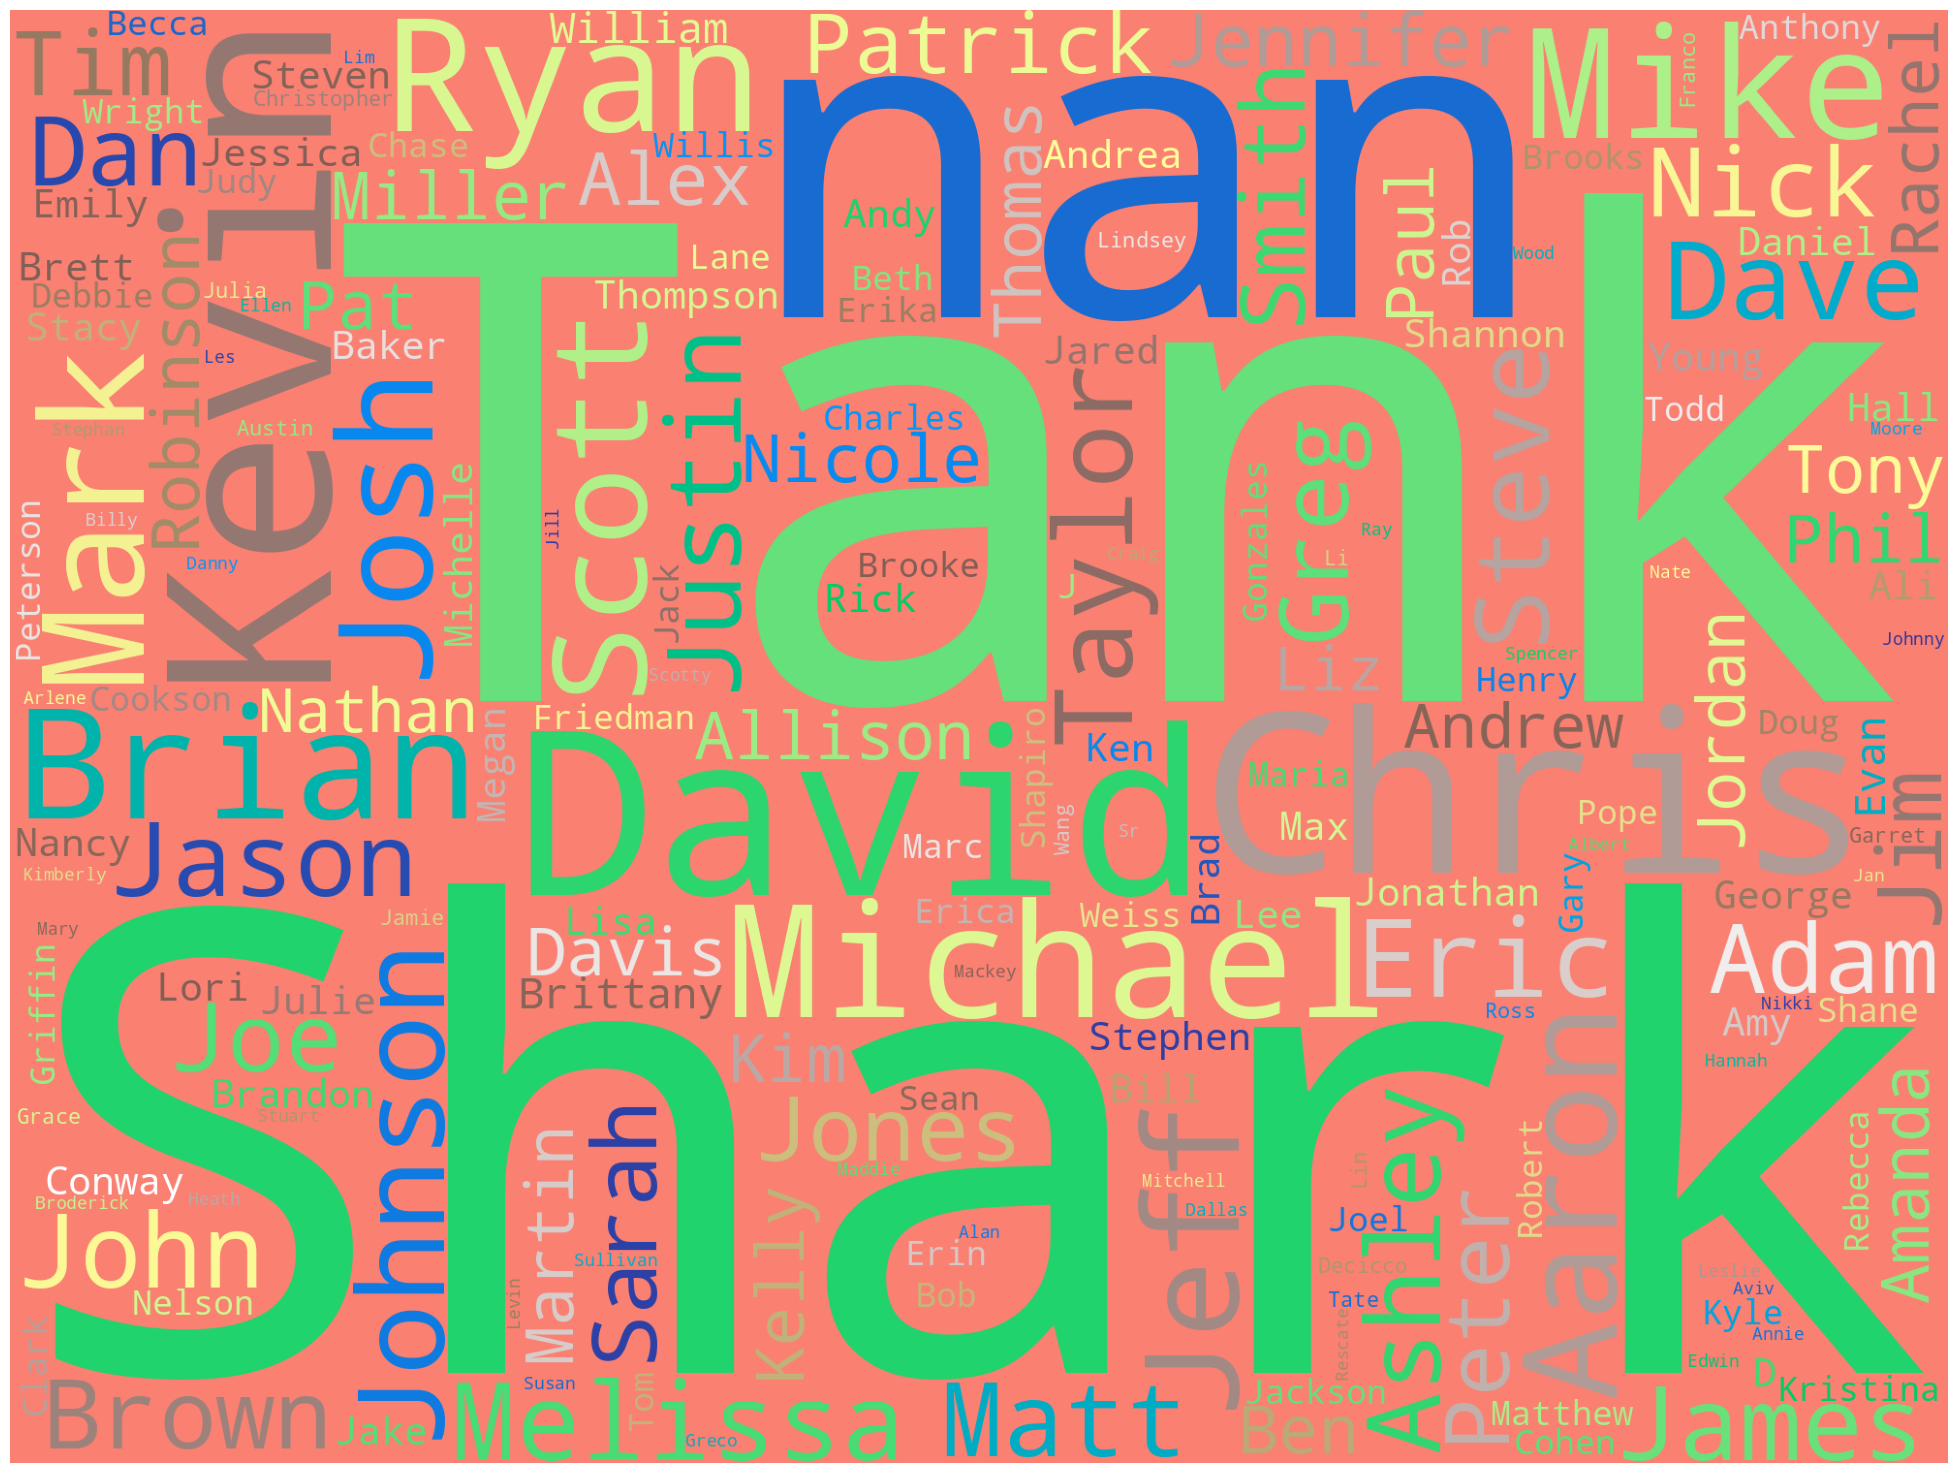

In [58]:
# Word cloud based on Pitcher name
text = " Shark Tank ".join(cat for cat in shark_tank['Entrepreneur Names'].astype(str))
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='terrain_r', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [59]:
# Many (130+) companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Season Number       Startup Name  Original Ask Amount  Total Deal Amount
15                1     GiftCardRescue               150000           200000.0
30                1      Soy-Yer-Dough               125000           300000.0
43                1        JumpForward               150000           600000.0
64                2       WurkinStiffs                85000           100000.0
65                2          TippiToes                30000           100000.0
...             ...                ...                  ...                ...
1272             14            Eyewris                25000           125000.0
1281             15            ToastIt               100000           150000.0
1282             15             Bot-It               150000           300000.0
1291             15    Thrill Builders               250000           300000.0
1319             15  Mama Sing My Song               125000           150000.0

[130 rows x 4 columns]

In [60]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Season Number        Startup Name  Original Offered Equity  \
0                 1      AvaTheElephant                     15.0   
1                 1  Mr.Tod'sPieFactory                     10.0   
5                 1        APerfectPear                     15.0   
6                 1       ClassroomJams                     10.0   
10                1         TurboBaster                     35.0   
...             ...                 ...                      ...   
1319             15   Mama Sing My Song                     10.0   
1320             15             BarBees                     10.0   
1321             15   Meat the Mushroom                      7.5   
1322             15             Au Baby                     25.0   
1323             15       Genius Litter                      4.0   

      Total Deal Equity  
0                  55.0  
1                  50.0  
5                  50.0  
6                 100.0  
10                100.0  
...                 ...  
1319               33.3  
1320               20.0  
1321               33.3  
1322               35.0  
1323                8.0  

[683 rows x 4 columns]

In [61]:
# Below (102) companies got the same valuation they requested (with or without loan)
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number       Startup Name  Valuation Requested  Deal Valuation
51                1  GreaseMonkeyWipes               100000        100000.0
60                1             Qubits               176471        176471.0
78                2    Ride-OnCarry-On               200000        200000.0
85                2         DaisyCakes               200000        200000.0
92                2             HyConn              1250000       1250000.0
...             ...                ...                  ...             ...
1216             14         ShredSkinz               300000        300000.0
1218             14            ChessUp              6000000       6000000.0
1264             14         Tia Lupita             10000000      10000000.0
1311             15      Dingle Dangle               375000        375000.0
1315             15           Poplight              1875000       1875000.0

[102 rows x 4 columns]

In [62]:
# There are 47 companies which got more valuation than they pitched
print(shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    47
dtype: int64


Season Number              Startup Name  Valuation Requested  \
30                1             Soy-Yer-Dough               500000   
31                1            GrillCharmsSet               200000   
77                2            HillbillyBrand               200000   
84                2                 SweepEasy               160000   
104               3     IWantToDrawACatForYou                40000   
112               3               WineBalloon               133333   
113               3                    ShowNo               200000   
149               3             BootIllusions               333333   
232               4              Lose12Inches               480000   
268               5              Breathometer              2500000   
276               5                 Hamboards               666667   
285               5                  FiberFix               900000   
323               5        TheCookieDoughCafe               250000   
324               5                Cycloramic              1800000   
336               5                RevoLights              1500000   
400               6          BeatBoxBeverages              2000000   
436               6                     Lumio              3125000   
444               6               DrainStrain               733333   
491               6                SharkWheel              2000000   
502               7                  Loliware              1500000   
514               7                    XCraft              2500000   
517               7               Windcatcher              2500000   
580               7                     Vengo             16000000   
582               7                Wondercide             10000000   
654               8             HandOutGloves               750000   
671               8                 Tranquilo              1000000   
675               8                   Toymail             10000000   
721               9                 IceShaker               666667   
744               9                 DNASimple               800000   
775               9                RounderBum              1500000   
788               9                   Radiate               250000   
829              10                  OatMeals              2500000   
831              10                  PopItPal              2500000   
845              10          MakeupJunkieBags              1333333   
852              10                   SubSafe               384615   
912              11                  MyoStorm              1500000   
925              11  Mrs.Goldfarb'sUnrealDeli              1000000   
935              11            KreyÃ²lEssence              4000000   
1045             12              ByootCompany               166667   
1066             12                    Phoozy              5000000   
1150             13                   Ade+Ayo              1750000   
1151             13                   Sunflow             16666667   
1176             13           KawaiiLightning               400000   
1193             14                TheWoobles              5000000   
1208             14                Collars&Co              7500000   
1272             14                   Eyewris               500000   
1273             14            TonesOfMelanin              2000000   

      Deal Valuation  
30          588235.0  
31          250000.0  
77          300000.0  
84          227273.0  
104          75758.0  
112         400000.0  
113         300000.0  
149        1250000.0  
232         500000.0  
268        3333333.0  
276        1000000.0  
285        2083333.0  
323         333333.0  
324        3333333.0  
336        3000000.0  
400        3030303.0  
436        3500000.0  
444        1100000.0  
491        3000000.0  
502        2400000.0  
514        6000000.0  
517        4000000.0  
580       20000000.0  
582       16666667.0  
654        1200000.0  
671        1333333.0  
675       12000000.0  
7

In [63]:
# Episodes which got most TRP
print("Maximum viewership in US:", shark_tank['US Viewership'].max(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']>=shark_tank['US Viewership'].max()-0.4][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership",ascending=False).to_string(index=False))

Maximum viewership in US: 8.64 

 Season Number  Episode Number    Startup Name  US Viewership
             6              15        TurboPUP           8.64
             6              15           Lumio           8.64
             6              15      BelloVerde           8.64
             6              15         Napwell           8.64
             6              20        LuminAid           8.43
             6              20         Scholly           8.43
             6              20        KeenHome           8.43
             6              20    TaalumaTotes           8.43
             5              27       Angellift           8.33
             5              27        HangEase           8.33
             5              27 TheBouqsCompany           8.33
             5              27      SustyParty           8.33
             5              21   PackbackBooks           8.29
             5              21          Chapul           8.29
             5              21  Garag

In [64]:
# Episodes which got least TRP
print("Minimum viewership in United States:", shark_tank['US Viewership'].min(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']<=shark_tank['US Viewership'].min()+0.3][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership").to_string(index=False))

Minimum viewership in United States: 2.27 

 Season Number  Episode Number    Startup Name  US Viewership
            11              23          Salted           2.27
            11              23       MCSquares           2.27
            11              23           Slate           2.27
            11              23     RescueReady           2.27
            12               4      JadaSpices           2.31
            12               4    SurpriseCake           2.31
            12               4 TheMightyCarver           2.31
            12               4        Flipstik           2.31
            11              21          Proven           2.39
            11              21         Tanoshi           2.39
            11              21      UnbuckleMe           2.39
            11              21     VanRobotics           2.39


In [65]:
# Solo or multiple Entrepreneurs ?
print(shark_tank['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(shark_tank['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["lightgreen","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Multiple Entrepreneurs"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="red")
    
ax2 = plt.subplot(222)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["lightgreen","yellow"], shadow=True, fontsize=14)

Multiple Entrepreneurs
0    493
1    405
Name: count, dtype: Int64 

Multiple Entrepreneurs
0    55%
1    45%
Name: proportion, dtype: object


<Axes: ylabel='count'>

In [66]:
# Word cloud based on Business Description
text = " Shark Tank America ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [67]:
# Correlation matrix
shark_tank.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

In [68]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Py versions
# numpy version: 1.26.3
# pandas version: 2.2.0
# matplotlib version: 3.7.4
# seaborn version: 0.12.2
# plotly version: 5.18.0

numpy version: 1.26.3
pandas version: 2.2.0
matplotlib version: 3.7.4
seaborn version: 0.12.2
plotly version: 5.18.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [69]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [70]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [71]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [72]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [73]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [74]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [75]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Amount'].fillna(0) + shark_tank['Mark Cuban Investment Amount'].fillna(0) + shark_tank['Lori Greiner Investment Amount'].fillna(0) + shark_tank['Robert Herjavec Investment Amount'].fillna(0) + shark_tank['Daymond John Investment Amount'].fillna(0) + shark_tank['Kevin O Leary Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [76]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Equity'].fillna(0) + shark_tank['Mark Cuban Investment Equity'].fillna(0) + shark_tank['Lori Greiner Investment Equity'].fillna(0) + shark_tank['Robert Herjavec Investment Equity'].fillna(0) + shark_tank['Daymond John Investment Equity'].fillna(0) + shark_tank['Kevin O Leary Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [77]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [78]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].isnull()) & (shark_tank['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [79]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] != 0) & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [80]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 0) & (shark_tank['Entrepreneur Names'].notnull() & shark_tank['Entrepreneur Names'].str.contains(' and'))]

Season Number Startup Name  Episode Number  Pitch Number Season Start  \
1301             15   Yum Crumbs               7          1302    29-Sep-23   

     Season End Original Air Date           Industry    Business Description  \
1301        NaN         17-Nov-23  Food and Beverage  Dessert crumb toppings   

     Pitchers Gender Pitchers City Pitchers State Pitchers Average Age  \
1301            Male           NaN             FL                Young   

               Entrepreneur Names             Company Website  \
1301  Delson and Zaydon Jeanvilma  https://www.yumcrumbs.com/   

      Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
1301                       0           3.36               100000   

      Original Offered Equity  Valuation Requested  Got Deal  \
1301                     10.0              1000000         1   

      Total Deal Amount  Total Deal Equity  Deal Valuation  \
1301           100000.0               20.0        500000.0   

      Number of sharks in deal  ...  Royalty Deal  Loan  \
1301                       2.0  ...           NaN   NaN   

      Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
1301                             50000.0                                10.0   

      Mark Cuban Investment Amount  Mark Cuban Investment Equity  \
1301                           NaN                           NaN   

      Lori Greiner Investment Amount  Lori Greiner Investment Equity  \
1301                             NaN                             NaN   

      Robert Herjavec Investment Amount  Robert Herjavec Investment Equity  \
1301                                NaN                                NaN   

      Daymond John Investment Amount  Daymond John Investment Equity  \
1301                         50000.0                            10.0   

      Kevin O Leary Investment Amount  Kevin O Leary Investment Equity  \
1301                              NaN                              NaN   

      Guest Investment Amount  Guest Investment Equity  Guest Name  \
1301                      NaN                      NaN         NaN   

      Barbara Corcoran Present Mark Cuban Present  Lori Greiner Present  \
1301                       1.0                1.0                   1.0   

      Robert Herjavec Present  Daymond John Present  Kevin O Leary Present  \
1301                      NaN                   1.0                    1.0   

      Guest Present  Total Deal Amount in Millions  
1301            NaN                            0.1  

[1 rows x 52 columns]

In [81]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 1) & (shark_tank['Entrepreneur Names'].str.contains(' and ')==False)]

Season Number       Startup Name  Episode Number  Pitch Number  \
1298             15             Rekkie               7          1299   
1300             15         Bunny Eyez               7          1301   
1305             15  Black Paper Party               8          1306   

     Season Start Season End Original Air Date                 Industry  \
1298    29-Sep-23        NaN         17-Nov-23  Fitness/Sports/Outdoors   
1300    29-Sep-23        NaN         17-Nov-23           Fashion/Beauty   
1305    29-Sep-23        NaN          8-Dec-23          Uncertain/Other   

                         Business Description Pitchers Gender Pitchers City  \
1298                       Smart snow goggles            Male           NaN   
1300  Tilt-able and flippable reading glasses          Female           NaN   
1305        Products for Black representation          Female           NaN   

     Pitchers State Pitchers Average Age  \
1298            NaN               Middle   
1300            NaN               Middle   
1305             VI               Middle   

                                    Entrepreneur Names  \
1298                     Fletcher, David & Henry Pease   
1300             Jenny Hutt, Stacy Fritz, Andrea Gluck   
1305  Jasmine Hudson, Madia Willis, JâAaron Merchant   

                       Company Website  Multiple Entrepreneurs  US Viewership  \
1298               https://rekkie.com/                       1           3.36   
1300            https://bunnyeyez.com/                       1           3.36   
1305  https://www.blackpaperparty.com/                       1           3.28   

      Original Ask Amount  Original Offered Equity  Valuation Requested  \
1298               300000                     10.0              3000000   
1300               200000                     10.0              2000000   
1305               250000                      5.0              5000000   

      Got Deal  Total Deal Amount  Total Deal Equity  Deal Valuation  \
1298         1           300000.0               12.5       2400000.0   
1300         1           200000.0               20.0       1000000.0   
1305         1           250000.0               10.0       2500000.0   

      Number of sharks in deal  ...  Royalty Deal  Loan  \
1298                       1.0  ...           NaN   NaN   
1300                       1.0  ...           1.0   NaN   
1305                       1.0  ...           NaN   NaN   

      Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
1298                                 NaN                                 NaN   
1300                                 NaN                                 NaN   
1305                            250000.0                                10.0   

      Mark Cuban Investment Amount  Mark Cuban Investment Equity  \
1298                      300000.0                          12.5   
1300                           NaN                           NaN   
1305                           NaN                           NaN   

      Lori Greiner Investment Amount  Lori Greiner Investment Equity  \
1298                             NaN                             NaN   
1300                             NaN                             NaN   
1305                             NaN                             NaN   

      Robert Herjavec Investment Amount  Robert Herjavec Investment Equity  \
1298                                NaN                                NaN   
1300                                NaN                                NaN   
1305                                NaN                                NaN   

      Daymond John Investment Amount  Daymond John Investment Equity  \
1298                             NaN                             NaN   
1300                        200000.0                            20.0   
1305                             NaN                             NaN   

      Kevin O Leary Investment Amount  Kevin O Leary

In [82]:
shark_tank.loc[(shark_tank['Got Deal'] != 0) & (shark_tank['Got Deal'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [83]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [84]:
shark_tank.loc[(shark_tank['Pitchers Gender'] == 'Mixed Team') & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [85]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [86]:
shark_tank.loc[shark_tank['Total Deal Amount'] < shark_tank["Loan"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]

In [87]:
shark_tank.loc[(shark_tank['Pitchers State'] != 'Non-US') & (shark_tank['Pitchers State'].str.len()>2)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 52 columns]